In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:\programming\python\pyTrain\\tensorflow\FINAL_TF2_FILES\TF_2_Notebooks_and_Data\DATA\RSCCASN.csv",parse_dates=True,index_col='DATE')

In [3]:
df.columns=['Sales']

<AxesSubplot:xlabel='DATE'>

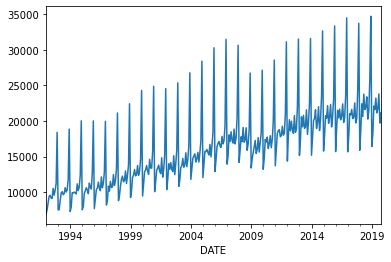

In [4]:
df['Sales'].plot()

In [5]:
len(df)

334

In [6]:
test_size=18
test_ind=len(df)-test_size

In [7]:
train=df.iloc[:test_ind]
test=df.iloc[test_ind:]

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler=MinMaxScaler()

In [10]:
scaler.fit(train)

MinMaxScaler()

In [11]:
scaled_train=scaler.transform(train)

In [12]:
scaled_test=scaler.transform(test)

In [13]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [14]:
length=12
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
n_features=1
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [18]:
earl=EarlyStopping(monitor='val_loss',patience=2)

In [19]:
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [20]:
model.fit(generator,epochs=20,validation_data=(validation_generator),callbacks=[earl])

Epoch 1/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0234 - val_loss: 0.0051
Epoch 2/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0185 - val_loss: 0.0037
Epoch 3/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0110 - val_loss: 0.0201
Epoch 4/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0066 - val_loss: 7.9103e-04
Epoch 5/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0036 - val_loss: 5.2345e-04
Epoch 6/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0020 - val_loss: 8.5422e-04
Epoch 7/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0024 - val_loss: 3.0397e-04
Epoch 8/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0014 - val_loss: 5.0780e-04
Epoch 9/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0018 - val_loss: 3.8968e-04


In [21]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

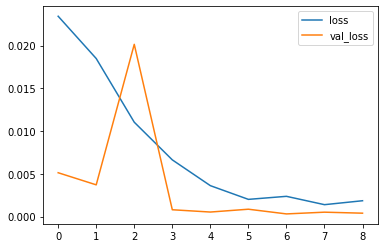

In [22]:
losses.plot()

In [24]:
test_prediction=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [25]:
test_prediction

[array([0.53313386], dtype=float32),
 array([0.49039978], dtype=float32),
 array([0.49938756], dtype=float32),
 array([0.56478333], dtype=float32),
 array([0.47179678], dtype=float32),
 array([0.4972521], dtype=float32),
 array([0.6407116], dtype=float32),
 array([0.9955004], dtype=float32),
 array([0.3226458], dtype=float32),
 array([0.4226611], dtype=float32),
 array([0.55540603], dtype=float32),
 array([0.49785048], dtype=float32),
 array([0.53448814], dtype=float32),
 array([0.49521995], dtype=float32),
 array([0.5051029], dtype=float32),
 array([0.5640212], dtype=float32),
 array([0.47937852], dtype=float32),
 array([0.50820243], dtype=float32)]

In [26]:
true_pred=scaler.inverse_transform(test_prediction)

In [27]:
test['prediction']=true_pred

In [28]:
test

,Sales,prediction
DATE,,
2018-05-01,23764,21622.639161
2018-06-01,21589,20445.571482
2018-07-01,21919,20693.131015
2018-08-01,23381,22494.392172
2018-09-01,20260,19933.170531
2018-10-01,21473,20634.312026
2018-11-01,25831,24585.760463
2018-12-01,34706,34358.062625
2019-01-01,16410,15824.956280


<AxesSubplot:xlabel='DATE'>

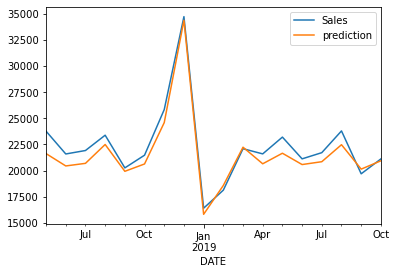

In [29]:
test.plot()

In [30]:
#forecast future data

In [34]:
full_scaler=MinMaxScaler()
scaled_full_data=full_scaler.fit_transform(df)

In [35]:
length=12
generator=TimeseriesGenerator(scaled_full_data,scaled_full_data,batch_size=1,length=length)

In [36]:
n_features=1
model=Sequential()
model.add(LSTM(100,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [38]:
model.fit(generator,epochs=13)

Epoch 1/13
322/322 [==============================] - 2s 6ms/step - loss: 0.0108
Epoch 2/13
322/322 [==============================] - 2s 7ms/step - loss: 0.0083
Epoch 3/13
322/322 [==============================] - 2s 7ms/step - loss: 0.0084
Epoch 4/13
322/322 [==============================] - 2s 7ms/step - loss: 0.0086
Epoch 5/13
322/322 [==============================] - 2s 6ms/step - loss: 0.0066
Epoch 6/13
322/322 [==============================] - 2s 7ms/step - loss: 0.0042
Epoch 7/13
322/322 [==============================] - 2s 7ms/step - loss: 0.0042
Epoch 8/13
322/322 [==============================] - 2s 7ms/step - loss: 0.0049
Epoch 9/13
322/322 [==============================] - 2s 6ms/step - loss: 0.0031
Epoch 10/13
322/322 [==============================] - 2s 7ms/step - loss: 0.0022
Epoch 11/13
322/322 [==============================] - 2s 6ms/step - loss: 0.0027
Epoch 12/13
322/322 [==============================] - 2s 7ms/step - loss: 0.0020
Epoch 13/13
322/322 [====

In [45]:
forecast=[]
period=12
first_eval_batch=scaled_full_data[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(period):
    current_pred=model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [46]:
forecast

[array([0.73786163], dtype=float32),
 array([0.9823805], dtype=float32),
 array([0.38807872], dtype=float32),
 array([0.4622754], dtype=float32),
 array([0.5747354], dtype=float32),
 array([0.5707997], dtype=float32),
 array([0.6062323], dtype=float32),
 array([0.5508535], dtype=float32),
 array([0.5714086], dtype=float32),
 array([0.60149384], dtype=float32),
 array([0.48988315], dtype=float32),
 array([0.57342196], dtype=float32)]

In [47]:
forecast=scaler.inverse_transform(forecast)

In [48]:
forecast

array([[27261.66082764],
       [33996.68875027],
       [17627.24024653],
       [19670.91322803],
       [22768.51194191],
       [22660.10716724],
       [23636.0620718 ],
       [22110.70855141],
       [22676.87928867],
       [23505.54620361],
       [20431.34161115],
       [22732.33433151]])

In [49]:
forecast_index=pd.date_range(start='2019-11-1',periods=period,freq='MS')

In [50]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [51]:
forecast_df=pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

(576.0, 611.0)

<Figure size 864x288 with 0 Axes>

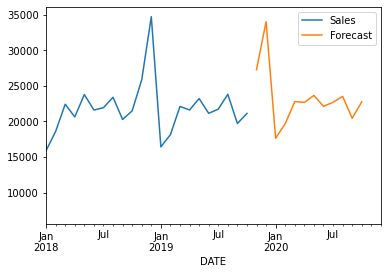

In [64]:
plt.figure(figsize=(12,4))
ax=df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-1','2020-12-01')